# Computational Drug Discovery - Machine Learning


we will be performing Data Collection and Pre-Processing from the ChEMBL Database.

#### **ChEMBL Database**

The [*ChEMBL Database*](https://www.ebi.ac.uk/chembl/) is a database that contains curated bioactivity data of more than 2 million compounds. It is compiled from more than 76,000 documents, 1.2 million assays and the data spans 13,000 targets and 1,800 cells and 33,000 indications.
[Data as of March 25, 2020; ChEMBL version 26].

## **Importing libraries**

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from chembl_webresource_client.new_client import new_client
# chembl_webresource_client is a Python client for accessing ChEMBL data via the RESTful web services interface.
# this library is used to access ChEMBL database and retrieve bioactivity data for our target of interest.
# ChEMBL is a manually curated database of bioactive molecules with drug-like properties.

## **Search for Target protein**

In [2]:
# Target search for Carbonic anhydrase VA
# initialize the target search of chembl
target = new_client.target
target_query = target.search('Nucleoside triphosphate phosphohydrolase') # list of dictionaries is returned
targets = pd.DataFrame.from_dict(target_query) # convert to dataframe
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Homo sapiens,Cancer-related nucleoside-triphosphatase,41.0,False,CHEMBL4295936,"[{'accession': 'Q9BSD7', 'component_descriptio...",SINGLE PROTEIN,9606
1,[],Rattus norvegicus,Nucleoside triphosphate diphosphohydrolase 3,26.0,False,CHEMBL1075237,"[{'accession': 'Q80Z26', 'component_descriptio...",SINGLE PROTEIN,10116
2,[],Homo sapiens,Inosine triphosphate pyrophosphatase,26.0,False,CHEMBL4105788,"[{'accession': 'Q9BY32', 'component_descriptio...",SINGLE PROTEIN,9606
3,[],Homo sapiens,"7,8-dihydro-8-oxoguanine triphosphatase",24.0,False,CHEMBL3708265,"[{'accession': 'P36639', 'component_descriptio...",SINGLE PROTEIN,9606
4,[],Homo sapiens,Nucleotide triphosphate diphosphatase NUDT15,19.0,False,CHEMBL4105827,"[{'accession': 'Q9NV35', 'component_descriptio...",SINGLE PROTEIN,9606
...,...,...,...,...,...,...,...,...,...
65,[],Homo sapiens,Uridine diphosphate glucose pyrophosphatase,9.0,False,CHEMBL4105943,"[{'accession': 'O95848', 'component_descriptio...",SINGLE PROTEIN,9606
66,"[{'xref_id': 'P30085', 'xref_name': None, 'xre...",Homo sapiens,UMP-CMP kinase,8.0,False,CHEMBL5681,"[{'accession': 'P30085', 'component_descriptio...",SINGLE PROTEIN,9606
67,[],Homo sapiens,ADP-sugar pyrophosphatase,8.0,False,CHEMBL4105713,"[{'accession': 'Q9UKK9', 'component_descriptio...",SINGLE PROTEIN,9606
68,[],Homo sapiens,Bis(5'-nucleosyl)-tetraphosphatase [asymmetrical],8.0,False,CHEMBL4105863,"[{'accession': 'P50583', 'component_descriptio...",SINGLE PROTEIN,9606


In [3]:
# def NumberOfActivities(targets):
#     listofTargets = []
#     for i in range(len(targets)):
#         dict1={}
#         selected_target = targets.target_chembl_id[i]
#         activity = new_client.activity
#         res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")
#         df = pd.DataFrame.from_dict(res)
#         activityNum=df.shape
#         dict1={'target_chembl_id':selected_target,'activityNum':activityNum[0], 'id':i, 'pref_name':targets.pref_name[i]}
#         listofTargets.append(dict1)
#     listofTargets.sort(key=lambda x:x['activityNum'],reverse=True)
#     return listofTargets
# listofTargets = []

# x = NumberOfActivities(targets)
# x[0:10]

In [4]:
# Select and retrieve bioactivity data for the target of interest 
selected_target = targets.target_chembl_id[26]
# initialize the bioactivity data
activity = new_client.activity
# retrieve the bioactivity data for the selected target of interest with IC50 as standard type
# IC50 is the concentration of a drug required to inhibit the growth of a microorganism by 50%.
# The IC50 is a measure of the potency of a drug.
# The lower the IC50 value, the more potent the drug.
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")
df = pd.DataFrame.from_dict(res)
df.shape

(275, 45)

In [5]:
# df head show all the columns
df.head(3)

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,Not Determined,10946312,[],CHEMBL2049243,Inhibition of human dUTPase using [5-3H]dUTP a...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,dUTP pyrophosphatase,9606,None,None,IC50,None,None,None,None
1,None,10946313,[],CHEMBL2049243,Inhibition of human dUTPase using [5-3H]dUTP a...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,dUTP pyrophosphatase,9606,None,None,IC50,uM,UO_0000065,None,15.0
2,None,10946314,[],CHEMBL2049243,Inhibition of human dUTPase using [5-3H]dUTP a...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,dUTP pyrophosphatase,9606,None,None,IC50,uM,UO_0000065,None,97.0


Finally we will save the resulting bioactivity data to a CSV file **bioactivity_data.csv**.

In [6]:
df.to_csv('Data/01_bioactivity_data_raw.csv', index=False)

## **Handling missing data**
If any compounds has missing value for the **standard_value** and **canonical_smiles** column then drop it.

In [7]:
# Remove columns with missing values in the standard_value column
df2 = df[df.standard_value.notna()]
# Remove columns with missing values in the canonical_smiles column
# canonical_smiles is a unique representation of a molecule in the form of a string.
# example: Cc1ccccc1C(=O)Nc1ccc(O)cc1
# we will use this column to calculate molecular descriptors?
# molecular descriptors are numerical values that describe the chemical properties of a molecule.
df2 = df2[df.canonical_smiles.notna()]
df2.head(3)

/tmp/ipykernel_18578/3785007853.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[df.canonical_smiles.notna()]


,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
1,None,10946313,[],CHEMBL2049243,Inhibition of human dUTPase using [5-3H]dUTP a...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,dUTP pyrophosphatase,9606,None,None,IC50,uM,UO_0000065,None,15.0
2,None,10946314,[],CHEMBL2049243,Inhibition of human dUTPase using [5-3H]dUTP a...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,dUTP pyrophosphatase,9606,None,None,IC50,uM,UO_0000065,None,97.0
3,None,10946315,[],CHEMBL2049243,Inhibition of human dUTPase using [5-3H]dUTP a...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,dUTP pyrophosphatase,9606,None,None,IC50,uM,UO_0000065,None,30.0


In [8]:
len(df2.canonical_smiles.unique())

229

In [9]:
df2_nr = df2.drop_duplicates(['canonical_smiles'])
df2_nr.shape

(229, 45)

## **Data pre-processing of the bioactivity data**

**Combine the 3 columns (molecule_chembl_id,canonical_smiles,standard_value) and bioactivity_class into a DataFrame**

In [10]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_nr[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
1,CHEMBL1232397,O=c1ccn([C@H]2C[C@H](O)[C@@H](COP(=O)(O)NP(=O)...,15000.0
2,CHEMBL2048444,CC(C)(C)NC(=O)CCCn1ccc(=O)[nH]c1=O,97000.0
3,CHEMBL2048445,CC(C)(C)CC(C)(C)NC(=O)CCn1ccc(=O)[nH]c1=O,30000.0
4,CHEMBL2048446,CCC(CC)(CC)NC(=O)CCn1ccc(=O)[nH]c1=O,22000.0
5,CHEMBL2048447,CC(C)(C)NC(=O)CCn1ccc(=O)[nH]c1=O,30000.0
...,...,...,...
246,CHEMBL3664498,O=c1ccn(COCCCCNS(=O)(=O)c2cccc(OCC3CC3)c2)c(=O...,640.0
247,CHEMBL3664499,O=c1ccn(COCCCC2(NS(=O)(=O)c3cccc(OCC4CC4)c3)CC...,130.0
252,CHEMBL3664500,CC(C)(NS(=O)(=O)c1cccc(OCC2CC2)c1)c1ccc(Cn2ccc...,110.0
254,CHEMBL3664501,CN(C(CCn1ccc(=O)[nH]c1=O)C(=O)NO)S(=O)(=O)c1cc...,97200.0


Saves dataframe to CSV file

In [11]:
df3.to_csv('Data/02_bioactivity_data_preprocessed.csv', index=False)

### **Labeling compounds as either being active, inactive or intermediate**
The bioactivity data is in the IC50 unit. Compounds having values of less than 1000 nM will be considered to be **active** while those greater than 10,000 nM will be considered to be **inactive**. As for those values in between 1,000 and 10,000 nM will be referred to as **intermediate**. 

In [12]:
df4 = pd.read_csv('Data/02_bioactivity_data_preprocessed.csv')

In [13]:
# activity_class is a new column that will be created to classify the bioactivity of the molecules
# based on the standard_value column
def bioactivity_level(value):
  if value >= 10000:
    return "inactive"
  elif value <= 1000:
    return "active"
  else:
    return "intermediate"

df4['class'] = df4['standard_value'].apply(lambda x: bioactivity_level(float(x)))
df4

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL1232397,O=c1ccn([C@H]2C[C@H](O)[C@@H](COP(=O)(O)NP(=O)...,15000.0,inactive
1,CHEMBL2048444,CC(C)(C)NC(=O)CCCn1ccc(=O)[nH]c1=O,97000.0,inactive
2,CHEMBL2048445,CC(C)(C)CC(C)(C)NC(=O)CCn1ccc(=O)[nH]c1=O,30000.0,inactive
3,CHEMBL2048446,CCC(CC)(CC)NC(=O)CCn1ccc(=O)[nH]c1=O,22000.0,inactive
4,CHEMBL2048447,CC(C)(C)NC(=O)CCn1ccc(=O)[nH]c1=O,30000.0,inactive
...,...,...,...,...
224,CHEMBL3664498,O=c1ccn(COCCCCNS(=O)(=O)c2cccc(OCC3CC3)c2)c(=O...,640.0,active
225,CHEMBL3664499,O=c1ccn(COCCCC2(NS(=O)(=O)c3cccc(OCC4CC4)c3)CC...,130.0,active
226,CHEMBL3664500,CC(C)(NS(=O)(=O)c1cccc(OCC2CC2)c1)c1ccc(Cn2ccc...,110.0,active
227,CHEMBL3664501,CN(C(CCn1ccc(=O)[nH]c1=O)C(=O)NO)S(=O)(=O)c1cc...,97200.0,inactive


Saves dataframe to CSV file

In [14]:
df4.to_csv('Data/03_bioactivity_data_curated.csv', index=False)

# Computational Drug Discovery [Part 2]

 Exploratory Data Analysis**

In **Part 2**, we will be performing Descriptor Calculation and Exploratory Data Analysis.


## **Install conda and rdkit**

In [15]:
# ! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
# ! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
# ! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
# ! conda install -c rdkit rdkit -y
import sys
import pandas as pd
sys.path.append('/usr/local/lib/python3.7/site-packages/')

rdkit is a cheminformatics library that is used to perform various tasks in computational chemistry. It is used to perform tasks such as descriptor calculation, molecular visualization, and molecular similarity calculations.

## **Load bioactivity data**

In [16]:
df = pd.read_csv('Data/03_bioactivity_data_curated.csv')
df.head(3)

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL1232397,O=c1ccn([C@H]2C[C@H](O)[C@@H](COP(=O)(O)NP(=O)...,15000.0,inactive
1,CHEMBL2048444,CC(C)(C)NC(=O)CCCn1ccc(=O)[nH]c1=O,97000.0,inactive
2,CHEMBL2048445,CC(C)(C)CC(C)(C)NC(=O)CCn1ccc(=O)[nH]c1=O,30000.0,inactive


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_chembl_id  229 non-null    object 
 1   canonical_smiles    229 non-null    object 
 2   standard_value      229 non-null    float64
 3   class               229 non-null    object 
dtypes: float64(1), object(3)
memory usage: 7.3+ KB


In [18]:
df_clean_smiles = df.copy()
df_clean_smiles['canonical_smiles'] = df_clean_smiles['canonical_smiles'].str.split('.').apply(lambda x: max(x, key=len))
df_clean_smiles

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL1232397,O=c1ccn([C@H]2C[C@H](O)[C@@H](COP(=O)(O)NP(=O)...,15000.0,inactive
1,CHEMBL2048444,CC(C)(C)NC(=O)CCCn1ccc(=O)[nH]c1=O,97000.0,inactive
2,CHEMBL2048445,CC(C)(C)CC(C)(C)NC(=O)CCn1ccc(=O)[nH]c1=O,30000.0,inactive
3,CHEMBL2048446,CCC(CC)(CC)NC(=O)CCn1ccc(=O)[nH]c1=O,22000.0,inactive
4,CHEMBL2048447,CC(C)(C)NC(=O)CCn1ccc(=O)[nH]c1=O,30000.0,inactive
...,...,...,...,...
224,CHEMBL3664498,O=c1ccn(COCCCCNS(=O)(=O)c2cccc(OCC3CC3)c2)c(=O...,640.0,active
225,CHEMBL3664499,O=c1ccn(COCCCC2(NS(=O)(=O)c3cccc(OCC4CC4)c3)CC...,130.0,active
226,CHEMBL3664500,CC(C)(NS(=O)(=O)c1cccc(OCC2CC2)c1)c1ccc(Cn2ccc...,110.0,active
227,CHEMBL3664501,CN(C(CCn1ccc(=O)[nH]c1=O)C(=O)NO)S(=O)(=O)c1cc...,97200.0,inactive


## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10 

### **Import libraries**

In [19]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [20]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [21]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,467.157,-1.8987,7.0,10.0
1,253.302,0.2315,2.0,4.0
2,295.383,1.2577,2.0,4.0
3,281.356,1.0117,2.0,4.0
4,239.275,-0.1586,2.0,4.0
...,...,...,...,...
224,423.491,1.0582,2.0,7.0
225,449.529,1.5908,2.0,7.0
226,470.551,1.9823,2.0,7.0
227,474.495,0.9137,3.0,8.0


### **Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.

In [22]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,467.157,-1.8987,7.0,10.0
1,253.302,0.2315,2.0,4.0
2,295.383,1.2577,2.0,4.0
3,281.356,1.0117,2.0,4.0
4,239.275,-0.1586,2.0,4.0
...,...,...,...,...
224,423.491,1.0582,2.0,7.0
225,449.529,1.5908,2.0,7.0
226,470.551,1.9823,2.0,7.0
227,474.495,0.9137,3.0,8.0


In [23]:
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL1232397,O=c1ccn([C@H]2C[C@H](O)[C@@H](COP(=O)(O)NP(=O)...,15000.0,inactive
1,CHEMBL2048444,CC(C)(C)NC(=O)CCCn1ccc(=O)[nH]c1=O,97000.0,inactive
2,CHEMBL2048445,CC(C)(C)CC(C)(C)NC(=O)CCn1ccc(=O)[nH]c1=O,30000.0,inactive
3,CHEMBL2048446,CCC(CC)(CC)NC(=O)CCn1ccc(=O)[nH]c1=O,22000.0,inactive
4,CHEMBL2048447,CC(C)(C)NC(=O)CCn1ccc(=O)[nH]c1=O,30000.0,inactive
...,...,...,...,...
224,CHEMBL3664498,O=c1ccn(COCCCCNS(=O)(=O)c2cccc(OCC3CC3)c2)c(=O...,640.0,active
225,CHEMBL3664499,O=c1ccn(COCCCC2(NS(=O)(=O)c3cccc(OCC4CC4)c3)CC...,130.0,active
226,CHEMBL3664500,CC(C)(NS(=O)(=O)c1cccc(OCC2CC2)c1)c1ccc(Cn2ccc...,110.0,active
227,CHEMBL3664501,CN(C(CCn1ccc(=O)[nH]c1=O)C(=O)NO)S(=O)(=O)c1cc...,97200.0,inactive


Now, let's combine the 2 DataFrame

In [24]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [25]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL1232397,O=c1ccn([C@H]2C[C@H](O)[C@@H](COP(=O)(O)NP(=O)...,15000.0,inactive,467.157,-1.8987,7.0,10.0
1,CHEMBL2048444,CC(C)(C)NC(=O)CCCn1ccc(=O)[nH]c1=O,97000.0,inactive,253.302,0.2315,2.0,4.0
2,CHEMBL2048445,CC(C)(C)CC(C)(C)NC(=O)CCn1ccc(=O)[nH]c1=O,30000.0,inactive,295.383,1.2577,2.0,4.0
3,CHEMBL2048446,CCC(CC)(CC)NC(=O)CCn1ccc(=O)[nH]c1=O,22000.0,inactive,281.356,1.0117,2.0,4.0
4,CHEMBL2048447,CC(C)(C)NC(=O)CCn1ccc(=O)[nH]c1=O,30000.0,inactive,239.275,-0.1586,2.0,4.0
...,...,...,...,...,...,...,...,...
224,CHEMBL3664498,O=c1ccn(COCCCCNS(=O)(=O)c2cccc(OCC3CC3)c2)c(=O...,640.0,active,423.491,1.0582,2.0,7.0
225,CHEMBL3664499,O=c1ccn(COCCCC2(NS(=O)(=O)c3cccc(OCC4CC4)c3)CC...,130.0,active,449.529,1.5908,2.0,7.0
226,CHEMBL3664500,CC(C)(NS(=O)(=O)c1cccc(OCC2CC2)c1)c1ccc(Cn2ccc...,110.0,active,470.551,1.9823,2.0,7.0
227,CHEMBL3664501,CN(C(CCn1ccc(=O)[nH]c1=O)C(=O)NO)S(=O)(=O)c1cc...,97200.0,inactive,474.495,0.9137,3.0,8.0


### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [26]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [27]:
df_combined.standard_value.describe()

count       229.000000
mean       5853.135371
std       14735.186740
min          21.000000
25%         250.000000
50%         740.000000
75%        4100.000000
max      100000.000000
Name: standard_value, dtype: float64

In [28]:
-np.log10( (10**-9)* 100000000 )

1.0

In [29]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [30]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [31]:
df_norm = norm_value(df_combined)
df_norm

/tmp/ipykernel_18578/3416609517.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value', 1)


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL1232397,O=c1ccn([C@H]2C[C@H](O)[C@@H](COP(=O)(O)NP(=O)...,inactive,467.157,-1.8987,7.0,10.0,15000.0
1,CHEMBL2048444,CC(C)(C)NC(=O)CCCn1ccc(=O)[nH]c1=O,inactive,253.302,0.2315,2.0,4.0,97000.0
2,CHEMBL2048445,CC(C)(C)CC(C)(C)NC(=O)CCn1ccc(=O)[nH]c1=O,inactive,295.383,1.2577,2.0,4.0,30000.0
3,CHEMBL2048446,CCC(CC)(CC)NC(=O)CCn1ccc(=O)[nH]c1=O,inactive,281.356,1.0117,2.0,4.0,22000.0
4,CHEMBL2048447,CC(C)(C)NC(=O)CCn1ccc(=O)[nH]c1=O,inactive,239.275,-0.1586,2.0,4.0,30000.0
...,...,...,...,...,...,...,...,...
224,CHEMBL3664498,O=c1ccn(COCCCCNS(=O)(=O)c2cccc(OCC3CC3)c2)c(=O...,active,423.491,1.0582,2.0,7.0,640.0
225,CHEMBL3664499,O=c1ccn(COCCCC2(NS(=O)(=O)c3cccc(OCC4CC4)c3)CC...,active,449.529,1.5908,2.0,7.0,130.0
226,CHEMBL3664500,CC(C)(NS(=O)(=O)c1cccc(OCC2CC2)c1)c1ccc(Cn2ccc...,active,470.551,1.9823,2.0,7.0,110.0
227,CHEMBL3664501,CN(C(CCn1ccc(=O)[nH]c1=O)C(=O)NO)S(=O)(=O)c1cc...,inactive,474.495,0.9137,3.0,8.0,97200.0


In [32]:
df_norm.standard_value_norm.describe()

count       229.000000
mean       5853.135371
std       14735.186740
min          21.000000
25%         250.000000
50%         740.000000
75%        4100.000000
max      100000.000000
Name: standard_value_norm, dtype: float64

In [33]:
df_final = pIC50(df_norm)
df_final

/tmp/ipykernel_18578/3442786292.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value_norm', 1)


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL1232397,O=c1ccn([C@H]2C[C@H](O)[C@@H](COP(=O)(O)NP(=O)...,inactive,467.157,-1.8987,7.0,10.0,4.823909
1,CHEMBL2048444,CC(C)(C)NC(=O)CCCn1ccc(=O)[nH]c1=O,inactive,253.302,0.2315,2.0,4.0,4.013228
2,CHEMBL2048445,CC(C)(C)CC(C)(C)NC(=O)CCn1ccc(=O)[nH]c1=O,inactive,295.383,1.2577,2.0,4.0,4.522879
3,CHEMBL2048446,CCC(CC)(CC)NC(=O)CCn1ccc(=O)[nH]c1=O,inactive,281.356,1.0117,2.0,4.0,4.657577
4,CHEMBL2048447,CC(C)(C)NC(=O)CCn1ccc(=O)[nH]c1=O,inactive,239.275,-0.1586,2.0,4.0,4.522879
...,...,...,...,...,...,...,...,...
224,CHEMBL3664498,O=c1ccn(COCCCCNS(=O)(=O)c2cccc(OCC3CC3)c2)c(=O...,active,423.491,1.0582,2.0,7.0,6.193820
225,CHEMBL3664499,O=c1ccn(COCCCC2(NS(=O)(=O)c3cccc(OCC4CC4)c3)CC...,active,449.529,1.5908,2.0,7.0,6.886057
226,CHEMBL3664500,CC(C)(NS(=O)(=O)c1cccc(OCC2CC2)c1)c1ccc(Cn2ccc...,active,470.551,1.9823,2.0,7.0,6.958607
227,CHEMBL3664501,CN(C(CCn1ccc(=O)[nH]c1=O)C(=O)NO)S(=O)(=O)c1cc...,inactive,474.495,0.9137,3.0,8.0,4.012334


In [34]:
df_final.pIC50.describe()

count    229.000000
mean       6.027063
std        0.854599
min        4.000000
25%        5.387216
50%        6.130768
75%        6.602060
max        7.677781
Name: pIC50, dtype: float64

Let's write this to CSV file.

In [35]:
df_final.to_csv('Data/04_bioactivity_data_3class_pIC50.csv')

### **Removing the 'intermediate' bioactivity class**
Here, we will be removing the ``intermediate`` class from our data set.

In [36]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL1232397,O=c1ccn([C@H]2C[C@H](O)[C@@H](COP(=O)(O)NP(=O)...,inactive,467.157,-1.8987,7.0,10.0,4.823909
1,CHEMBL2048444,CC(C)(C)NC(=O)CCCn1ccc(=O)[nH]c1=O,inactive,253.302,0.2315,2.0,4.0,4.013228
2,CHEMBL2048445,CC(C)(C)CC(C)(C)NC(=O)CCn1ccc(=O)[nH]c1=O,inactive,295.383,1.2577,2.0,4.0,4.522879
3,CHEMBL2048446,CCC(CC)(CC)NC(=O)CCn1ccc(=O)[nH]c1=O,inactive,281.356,1.0117,2.0,4.0,4.657577
4,CHEMBL2048447,CC(C)(C)NC(=O)CCn1ccc(=O)[nH]c1=O,inactive,239.275,-0.1586,2.0,4.0,4.522879
...,...,...,...,...,...,...,...,...
224,CHEMBL3664498,O=c1ccn(COCCCCNS(=O)(=O)c2cccc(OCC3CC3)c2)c(=O...,active,423.491,1.0582,2.0,7.0,6.193820
225,CHEMBL3664499,O=c1ccn(COCCCC2(NS(=O)(=O)c3cccc(OCC4CC4)c3)CC...,active,449.529,1.5908,2.0,7.0,6.886057
226,CHEMBL3664500,CC(C)(NS(=O)(=O)c1cccc(OCC2CC2)c1)c1ccc(Cn2ccc...,active,470.551,1.9823,2.0,7.0,6.958607
227,CHEMBL3664501,CN(C(CCn1ccc(=O)[nH]c1=O)C(=O)NO)S(=O)(=O)c1cc...,inactive,474.495,0.9137,3.0,8.0,4.012334


Let's write this to CSV file.

In [37]:
df_2class.to_csv('Data/05_bioactivity_data_2class_pIC50.csv')

---

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [38]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

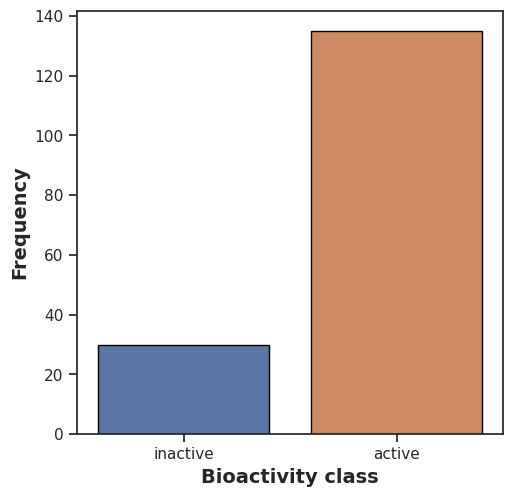

In [39]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

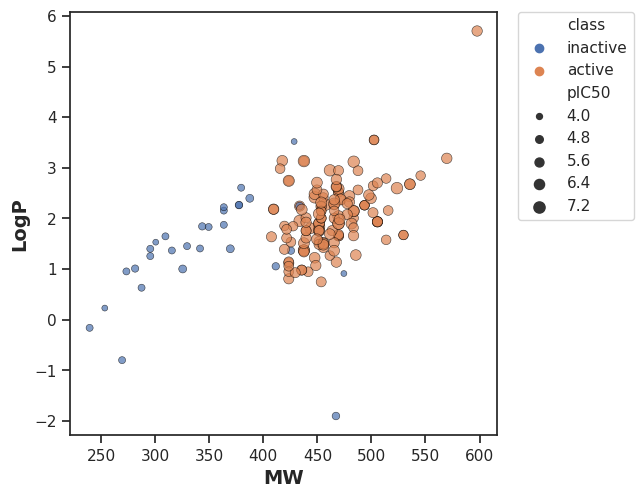

In [40]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pIC50 value**

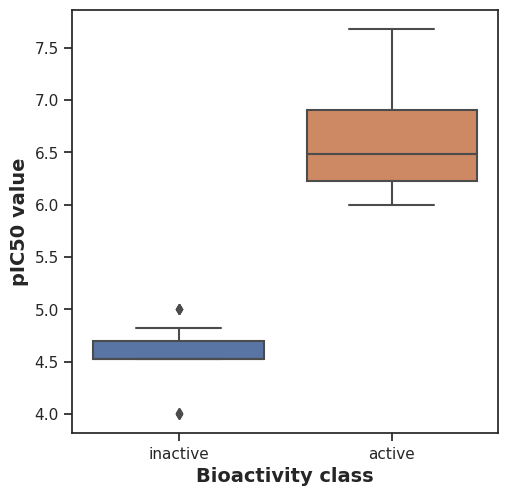

In [41]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [42]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [43]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,4050.0,1.136160e-17,0.05,Different distribution (reject H0)


#### **MW**

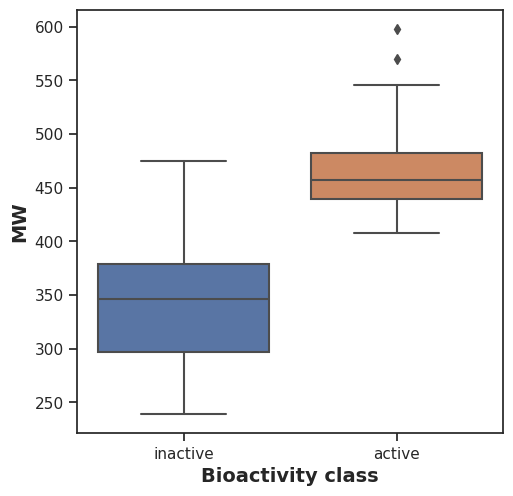

In [44]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [45]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,3817.5,3.692431e-14,0.05,Different distribution (reject H0)


#### **LogP**

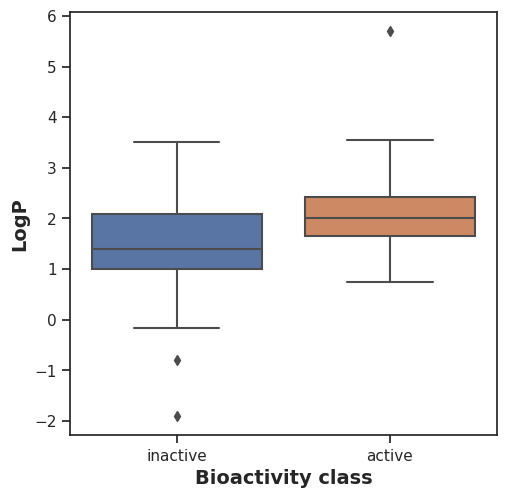

In [46]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [47]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,2912.0,0.00018,0.05,Different distribution (reject H0)


#### **NumHDonors**

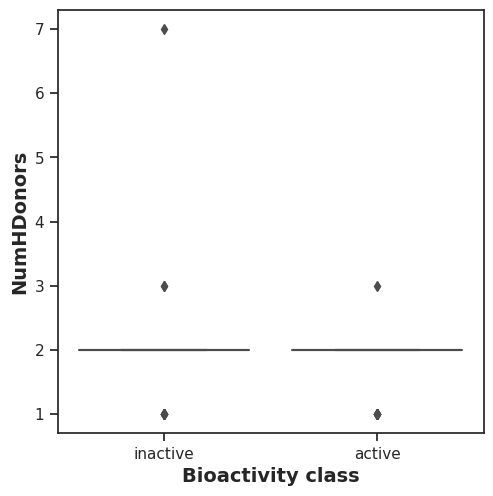

In [48]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [49]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,2198.0,0.188013,0.05,Same distribution (fail to reject H0)


#### **NumHAcceptors**

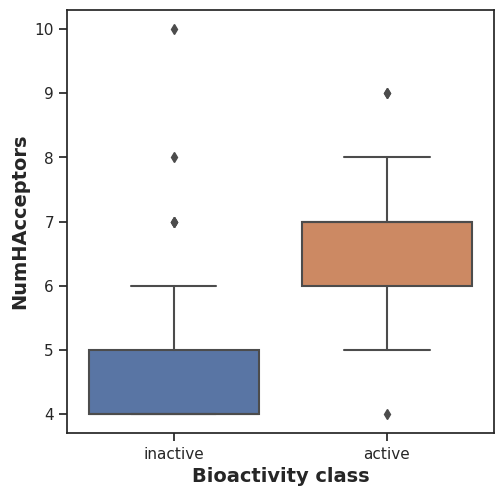

In [50]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [51]:
# save  mannwhitney('NumHAcceptors') in Data folder
mannwhitney('NumHAcceptors')


,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,3483.5,5.765206e-11,0.05,Different distribution (reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

All of the 4 Lipinski's descriptors exhibited ***statistically significant difference*** between the **actives** and **inactives**.

## **Zip files**

In [52]:
! zip -r EDA_results.zip . -i *.csv *.pdf *.png
! rm *.csv *.pdf *.png
! mv EDA_results.zip Data/

  adding: mannwhitneyu_MW.csv (deflated 7%)
  adding: plot_MW_vs_LogP.pdf (deflated 12%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 11%)
  adding: mannwhitneyu_LogP.csv (deflated 9%)
  adding: plot_ic50.pdf (deflated 38%)
  adding: plot_bioactivity_class.pdf (deflated 38%)
  adding: plot_NumHAcceptors.pdf (deflated 38%)
  adding: plot_LogP.pdf (deflated 37%)
  adding: plot_NumHDonors.pdf (deflated 39%)
  adding: mannwhitneyu_pIC50.csv (deflated 10%)
  adding: plot_MW.pdf (deflated 38%)
rm: cannot remove '*.png': No such file or directory


# Computational Drug Discovery [Part 3] 

Descriptor Calculation and Dataset Preparation

In **Part 3**, we will be calculating molecular descriptors that are essentially quantitative description of the compounds in the dataset. Finally, we will be preparing this into a dataset for subsequent model building in Part 4.

---

## **Load bioactivity data**

Download the curated ChEMBL bioactivity data that has been pre-processed from Parts 1 and 2 of this Bioinformatics Project series. Here we will be using the **bioactivity_data_3class_pIC50.csv** file that essentially contain the pIC50 values that we will be using for building a regression model.

In [53]:
import pandas as pd
df3 = pd.read_csv('Data/04_bioactivity_data_3class_pIC50.csv')

In [54]:
df3

,Unnamed: 0,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL1232397,O=c1ccn([C@H]2C[C@H](O)[C@@H](COP(=O)(O)NP(=O)...,inactive,467.157,-1.8987,7.0,10.0,4.823909
1,1,CHEMBL2048444,CC(C)(C)NC(=O)CCCn1ccc(=O)[nH]c1=O,inactive,253.302,0.2315,2.0,4.0,4.013228
2,2,CHEMBL2048445,CC(C)(C)CC(C)(C)NC(=O)CCn1ccc(=O)[nH]c1=O,inactive,295.383,1.2577,2.0,4.0,4.522879
3,3,CHEMBL2048446,CCC(CC)(CC)NC(=O)CCn1ccc(=O)[nH]c1=O,inactive,281.356,1.0117,2.0,4.0,4.657577
4,4,CHEMBL2048447,CC(C)(C)NC(=O)CCn1ccc(=O)[nH]c1=O,inactive,239.275,-0.1586,2.0,4.0,4.522879
...,...,...,...,...,...,...,...,...,...
224,224,CHEMBL3664498,O=c1ccn(COCCCCNS(=O)(=O)c2cccc(OCC3CC3)c2)c(=O...,active,423.491,1.0582,2.0,7.0,6.193820
225,225,CHEMBL3664499,O=c1ccn(COCCCC2(NS(=O)(=O)c3cccc(OCC4CC4)c3)CC...,active,449.529,1.5908,2.0,7.0,6.886057
226,226,CHEMBL3664500,CC(C)(NS(=O)(=O)c1cccc(OCC2CC2)c1)c1ccc(Cn2ccc...,active,470.551,1.9823,2.0,7.0,6.958607
227,227,CHEMBL3664501,CN(C(CCn1ccc(=O)[nH]c1=O)C(=O)NO)S(=O)(=O)c1cc...,inactive,474.495,0.9137,3.0,8.0,4.012334


In [55]:

selection = ['canonical_smiles','molecule_chembl_id']
df3_selection = df3[selection]
df3_selection.to_csv('Data/molecule.smi', sep='\t', index=False, header=False)
! cp Data/molecule.smi .

In [56]:
! cat Data/molecule.smi | head -5

O=c1ccn([C@H]2C[C@H](O)[C@@H](COP(=O)(O)NP(=O)(O)OP(=O)(O)O)O2)c(=O)[nH]1	CHEMBL1232397
CC(C)(C)NC(=O)CCCn1ccc(=O)[nH]c1=O	CHEMBL2048444
CC(C)(C)CC(C)(C)NC(=O)CCn1ccc(=O)[nH]c1=O	CHEMBL2048445
CCC(CC)(CC)NC(=O)CCn1ccc(=O)[nH]c1=O	CHEMBL2048446
CC(C)(C)NC(=O)CCn1ccc(=O)[nH]c1=O	CHEMBL2048447


In [57]:
! cat Data/molecule.smi | wc -l

229


## **Calculate fingerprint descriptors**


### **Calculate PaDEL descriptors**

In [58]:
! mv padel/padel.sh .
! mv padel/padel.zip .
! unzip padel.zip
! cat padel.sh | bash

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [59]:
! mv padel.zip padel.sh padel
! rm -r ./__MACOSX
! rm -r ./PaDEL-Descriptor
! rm molecule.smi 
! mv descriptors_output.csv Data


## **Preparing the X and Y Data Matrices**

### **X data matrix**

In [60]:
df3_X = pd.read_csv('Data/descriptors_output.csv')

In [61]:
df3_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL1232397,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL2048444,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL2048446,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL2048445,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL2048447,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,CHEMBL3664498,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
225,CHEMBL3664499,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
226,CHEMBL3664501,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
227,CHEMBL3664500,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
df3_X = df3_X.drop(columns=['Name'])
df3_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
225,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
226,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
227,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## **Y variable**

### **Convert IC50 to pIC50**

In [63]:
df3_Y = df3['pIC50']
df3_Y

0      4.823909
1      4.013228
2      4.522879
3      4.657577
4      4.522879
         ...   
224    6.193820
225    6.886057
226    6.958607
227    4.012334
228    6.214670
Name: pIC50, Length: 229, dtype: float64

## **Combining X and Y variable**

In [64]:
dataset3 = pd.concat([df3_X,df3_Y], axis=1)
dataset3

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.823909
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.013228
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.522879
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.657577
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.522879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.193820
225,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.886057
226,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.958607
227,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.012334


In [65]:
dataset3.to_csv('Data/06_bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)

# Bioinformatics Project - Computational Drug Discovery [Part 4] 

### Regression Models with Random Forest



In **Part 4**, we will be building a regression model of acetylcholinesterase inhibitors using the random forest algorithm.

---

## **1. Import libraries**

In [66]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## **2. Load the data set**

In [67]:
df = pd.read_csv('Data/06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [68]:
# remove any rows with missing values
df = df.dropna()

## **3. Input features**


### **3.1. Input features**

In [69]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
225,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
226,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
227,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### **3.2. Output features**

In [70]:
Y = df.pIC50
Y

0      4.823909
1      4.013228
2      4.522879
3      4.657577
4      4.522879
         ...   
224    6.193820
225    6.886057
226    6.958607
227    4.012334
228    6.214670
Name: pIC50, Length: 229, dtype: float64

### **3.3. Let's examine the data dimension**

In [71]:
X.shape

(229, 881)

In [72]:
Y.shape

(229,)

### **3.4. Remove low variance features**

In [73]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [74]:
X.shape

(229, 71)

## **4. Data split (80/20 ratio)**

In [75]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [76]:
X_train.shape, Y_train.shape

((183, 71), (183,))

In [77]:
X_test.shape, Y_test.shape

((46, 71), (46,))

## **5. Building a Regression Model using Random Forest**

In [78]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.41133915886931505

In [79]:
Y_pred = model.predict(X_test)

## **6. Scatter Plot of Experimental vs Predicted pIC50 Values**

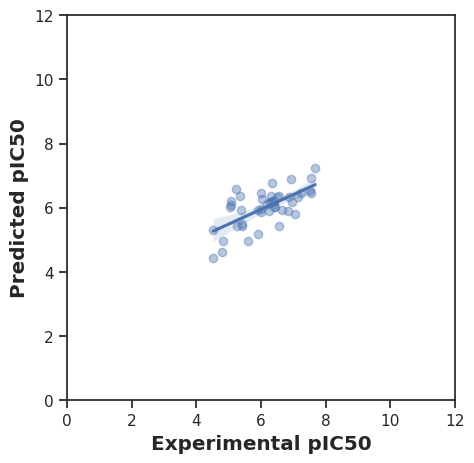

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame({'Experimental': Y_test, 'Predicted': Y_pred})
ax = sns.regplot(x='Experimental', y='Predicted', data=df, scatter_kws={'alpha': 0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show()

# **Bioinformatics Project - Computational Drug Discovery [Part 5] Comparing Regressors**


In Part 5, we will be comparing several ML algorithms for build regression models of acetylcholinesterase inhibitors.



## **1. Import libraries**

In [81]:
# ! pip install lazypredict

In [82]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

## **2. Load the data set**


In [83]:
df = pd.read_csv('Data/06_bioactivity_data_3class_pIC50_pubchem_fp.csv')
df=df.dropna()

In [84]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

## **3. Data pre-processing**

In [85]:
# Examine X dimension
X.shape

(229, 881)

In [86]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(229, 71)

In [87]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## **4. Compare ML algorithms**

In [88]:
# Defines and builds the lazyclassifier

clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [00:09<00:00,  4.47it/s]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [00:09<00:00,  4.44it/s]


In [89]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.69,0.81,0.38,0.07
ExtraTreeRegressor,0.69,0.81,0.38,0.05
ExtraTreesRegressor,0.69,0.81,0.38,0.34
GaussianProcessRegressor,0.69,0.81,0.38,0.05
XGBRegressor,0.69,0.81,0.38,0.22
RandomForestRegressor,0.62,0.77,0.42,0.29
GradientBoostingRegressor,0.57,0.74,0.45,0.17
BaggingRegressor,0.55,0.73,0.46,0.08
LinearRegression,0.38,0.62,0.54,0.04


In [90]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,6852.95,-3957.90,47.81,0.07
KernelRidge,114.54,-64.60,6.15,0.02
GaussianProcessRegressor,49.29,-26.90,4.01,0.05
PassiveAggressiveRegressor,6.33,-2.08,1.33,0.03
RANSACRegressor,3.47,-0.43,0.91,0.60
QuantileRegressor,2.74,-0.00,0.76,0.88
Lasso,2.73,-0.00,0.76,0.03
LassoLars,2.73,-0.00,0.76,0.03
DummyRegressor,2.73,-0.00,0.76,0.02


## **5. Data visualization of model performance**

[(0.0, 1.0)]

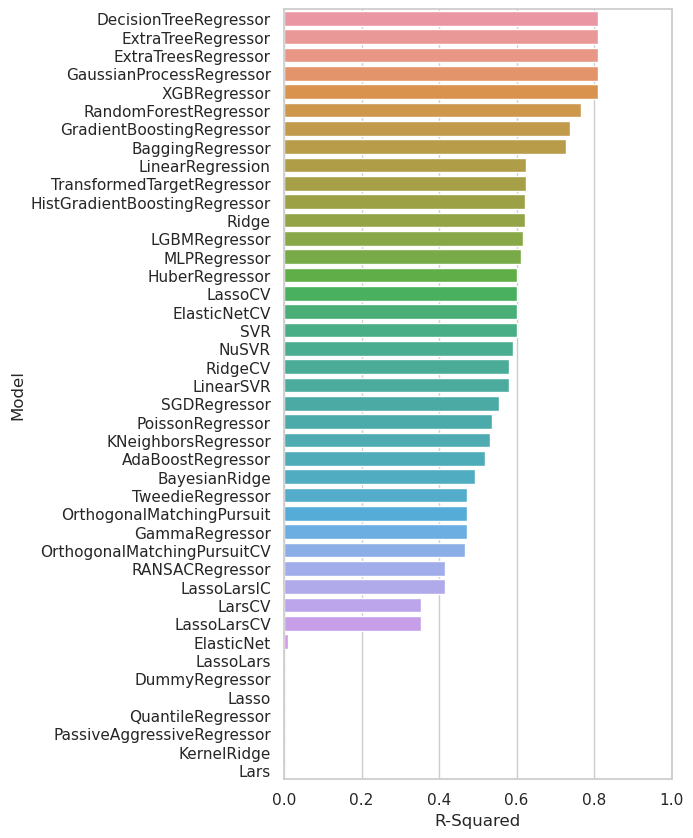

In [91]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

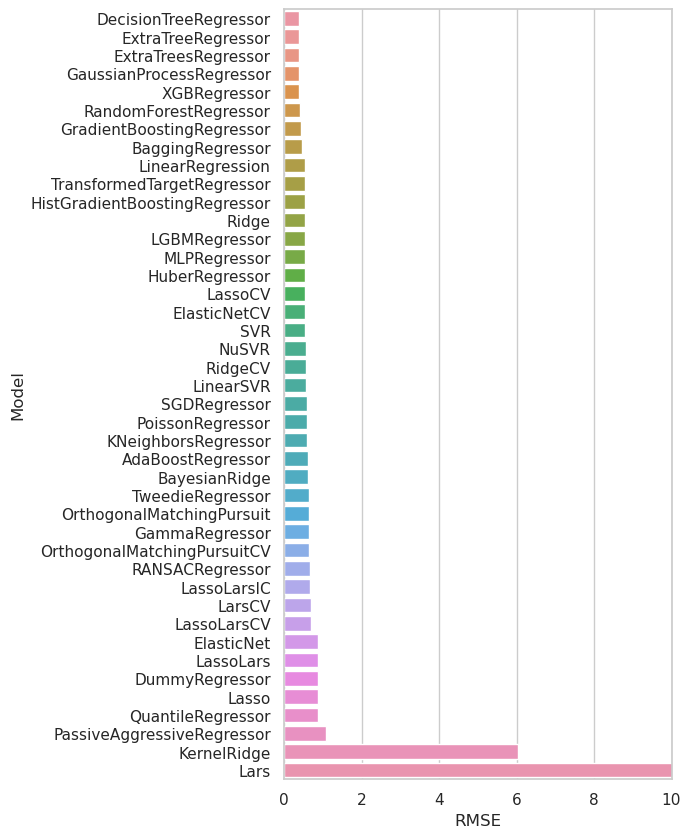

In [92]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

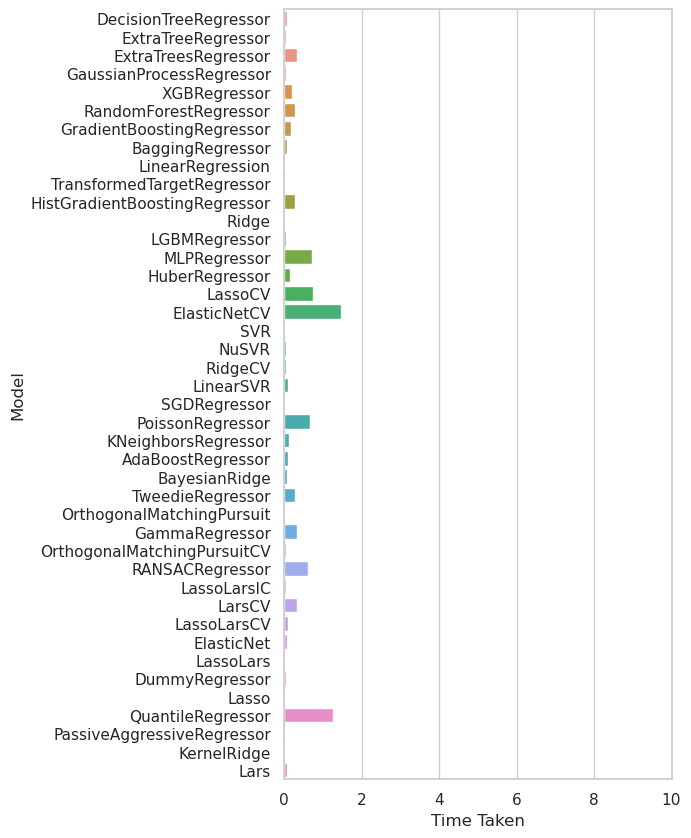

In [93]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))